# Анализ гипотез для увеличения выручки крупного интернет-магазина

### Описание данных
Файл "/datasets/hypothesis.csv" 

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, 
    тем дороже проверка гипотезы.

Файл "/datasets/orders.csv"

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл "/datasets/visitors.csv"

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез
### Описание данных
    Файл: "/datasets/hypothesis.csv"
    - Hypothesis — краткое описание гипотезы;
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Загрузка и подготовка данных 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Правильно, что импортируешь необходимые библиотеки в первой ячейке. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет настроить свое окружение при необходимости.
</div>

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 1
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [5]:
hypothesis.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

### Задачи
    - Применение фреймворка ICE для приоритизации гипотез, сортировка по убыванию приоритета;
    - Применение фреймворка RICE для приоритизации гипотез, сортировка по убыванию приоритета;
    - Как изменилась приоритизация гипотез при применении RICE вместо ICE. Почему так произошло.

In [6]:
# фреймворк ICE
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [7]:
# фреймворк RICE
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [8]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Приоритизация методом ICE выявила три наиболее перспективные гипотезы: 
- №8 'Запустить акцию, дающую скидку на товар в день рождения'
- №0 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- №7 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

Добавив параметр охвата REACH при оценке приоритизации методом RICE 7-я гипотеза вышла на первое место с большим отрывом.

Кроме того, добавились две другие значимые гипотезы:
- № 2 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
- № 6 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'

Гипотеза 8, лидировавшая при расчете ICE, опустилась на 5-е место. 

Видим, какое значение имеет параметр охвата - какое количество пользователей затронет то или иное предлагаемое изменение.
Акция "скидка в день рождения" безусловно является хорошим стимулом для совершения покупок и увеличения выручки, однако, добавив формы подписки для сбора клиентской базы, можно достичь определенных результатов гораздо быстрее, так как данную форму могут заполнить все посетители сайта, а воспользоваться скидкой только именинники.

 ## Анализ A/B-теста
 ### Описание данных
    Файл: "/datasets/orders.csv"
        - transactionId — идентификатор заказа;
        - visitorId — идентификатор пользователя, совершившего заказ;
        - date — дата, когда был совершён заказ;
        - revenue — выручка заказа;
        - group — группа A/B-теста, в которую попал заказ.

    Файл: "/datasets/visitors.csv"
        - date — дата;
        - group — группа A/B-теста;
        - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка и подготовка данных 

In [9]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',' )

display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
orders['date'].min()

'2019-08-01'

In [11]:
orders['date'].max()

'2019-08-31'

In [12]:
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
display(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [14]:
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

In [15]:
#double_users = orders.shape[0] - orders.groupby('visitorId')['group'].nunique().shape[0]

In [16]:
count_groups = orders.groupby('visitorId')['group'].nunique()
orders = orders.merge(count_groups, on=['visitorId'])
orders.rename(columns = {'group_x':'group', 'group_y':'group_count'}, inplace = True)

In [17]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [18]:
orders[orders['group_count'] == 2]

,transactionId,visitorId,date,revenue,group,group_count
2,2961555356,4069496402,2019-08-15,400,A,2
3,1473132782,4069496402,2019-08-12,640,B,2
23,2904772834,963407295,2019-08-15,300,B,2
24,1458356232,963407295,2019-08-14,4940,A,2
27,4252514150,351125977,2019-08-15,15185,B,2
...,...,...,...,...,...,...
1136,1254962016,2654030115,2019-08-14,1980,A,2
1173,1277417350,3963646447,2019-08-14,6385,A,2
1174,2289555915,3963646447,2019-08-14,7485,B,2
1182,4052155355,2949041841,2019-08-14,190,A,2


In [19]:
double=orders.query('group_count==2')
double.groupby('visitorId')['group'].nunique().shape[0]

58

In [20]:
# Исключим данные пользователей, состоящих в обеих группах
orders = orders.query('group_count==1')
display(orders.groupby('visitorId')['group'].nunique().shape[0])
orders.head()

973

,transactionId,visitorId,date,revenue,group,group_count
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
4,3797467345,1196621759,2019-08-15,9759,B,1
5,2282983706,2322279887,2019-08-15,2308,B,1
6,182168103,935554773,2019-08-15,2210,B,1


### График кумулятивной выручки по группам. Выводы и предположения.

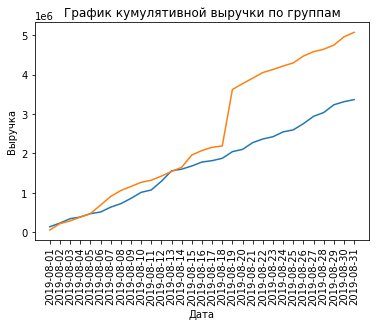

In [21]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show(block=False)

Выручка группы А равномерно растет на протяжении всего периода, что хорошо.
А вот график выручки группы В не такой стабильный и подвержен резким скачкам. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Дальше проанализируем подобный выброс.

### График кумулятивного среднего чека по группам. Выводы и предположения.

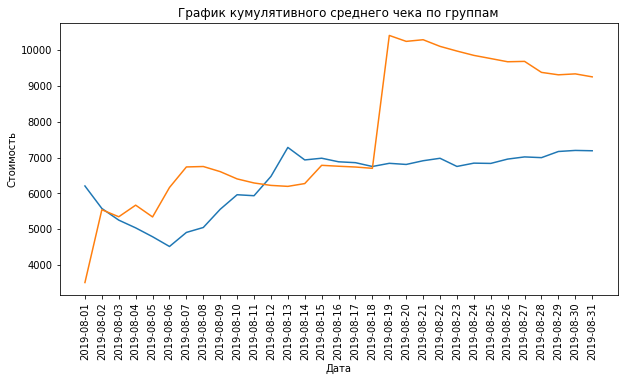

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Стоимость')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show(block=False)

За исключением небольшого отрезка времени, средний чек группы В всегда был заметно выше среднеге чека группы А. 
Динамика обеих групп была более резкой в первой половине и более стабильной во второй, хотя стали развиваться в противоположном направлении. Средний чек группы А после резкого роста и небольшого снижения медленно растет, а средний чек группы В после очень резкого роста за счет резкого увеличения покупок либо стоимости заказа плавно опускается вниз, но все равно продолжает быть гораздо выше среднего чека группы А. Видим что группа В гораздо охотнее совершает заказы в интернет-магазине. 

### График относительного изменения кумулятивного среднего чека группы B к группе A.                       Выводы и предположения.

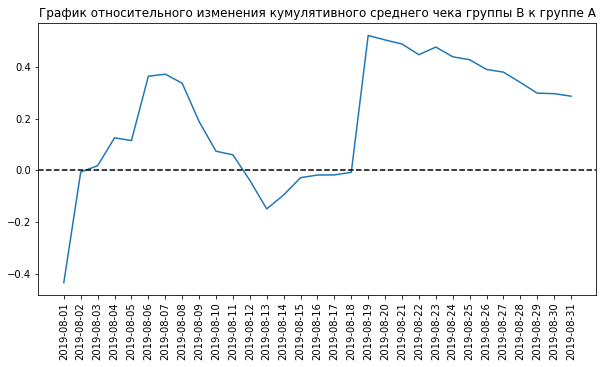

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.show(block=False)


В нескольких точках график различия между сегментами резко скачет. Очевидно преимущество группы В. Тем не менее, надо исследовать аномалии и анализировать без их учета. 

### График кумулятивной конверсии по группам. Выводы и предположения.

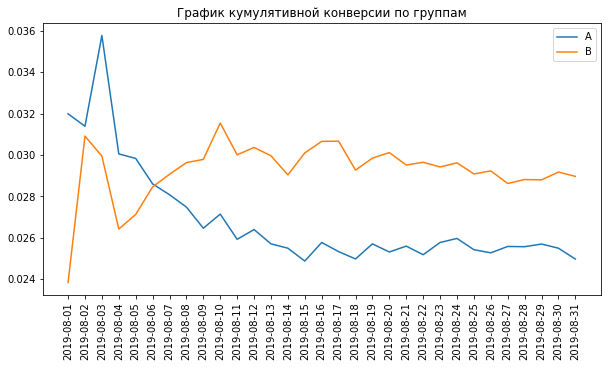

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90)
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.show(block=False)


До определенного момента поведение обеих групп было схожим, группа А лидировала, но затем группа В вырвалась вперед, графики стали симметричными и стабилизировались

### График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.

(0.0, 30.0, -0.3, 0.3)

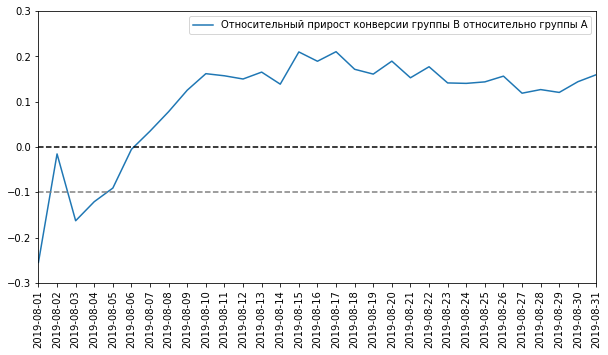

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=90)
plt.axis(["2019-08-01", '2019-08-31', -0.3 , 0.3])

Конверсия группы В преобладает, после резкого взлета она стабилизировалась с небольшим снижением.

### Точечный график количества заказов по пользователям. Выводы и предположения.

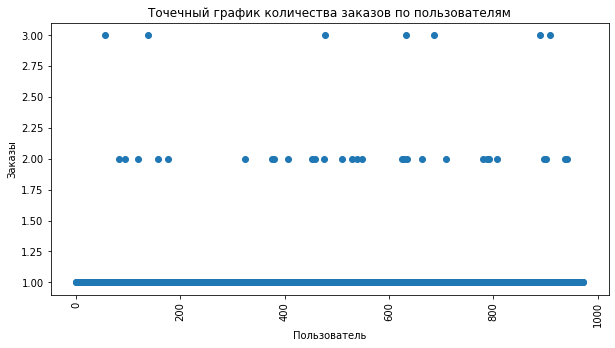

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Заказы')
plt.xlabel('Пользователь')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show(block=False)

Большинство посетителей ограничилось одним заказом в интернет-магазине. Также много пользователей с двумя и тремя заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Расчёт 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [27]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали более 1 покупки, не более 1% - больше 2.
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов. Выводы и предположения.

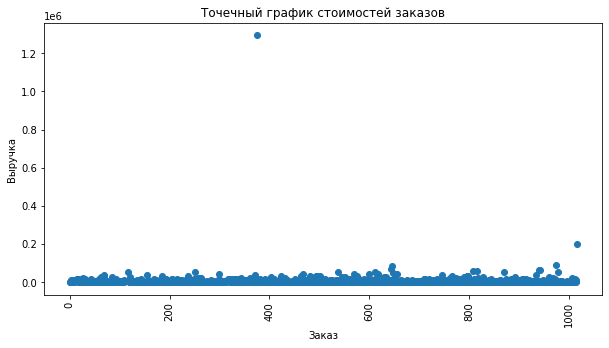

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.rcParams["figure.figsize"] = (12, 6)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Выручка')
plt.xlabel('Заказ')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show(block=False)

На графике видим, что кроме двух, стоимости заказов не превышали 100 000. Но у нас есть два выброса которые могут очень сильно исказить данные - один заказ примерно на 200 000 и один заказ почти на 1,3 млн. В дальнейшем исследует следует рассмотреть данные без учета аномалий

### Расчёт 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более чем у 5% заказов стоимость больше 26 785, не более чем у 1% стоимость больше 53 904.
Нижняя граница стоимости заказов = 26 785, все что свыше этой суммы - аномалии.

Посчитаем точное количество аномальных пользователей, совершивших три и более покупок на сумму свыше 28000


### Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.

    Для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни "st.mannwhitneyu()".
    Критический уровень статистической значимости равен 0.05.
    Также укажем относительный прирост показателей группы В. 
    
    ГИПОТЕЗЫ: 
        Нулевая: различий в конверсии между группами нет. 
        Альтернативная: различия в конверсии между группами есть.

    

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# Относительный прирост конверсии группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы B равен 16%. 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

    ГИПОТЕЗЫ: 
       Нулевая: различий в среднем чеке между группами нет. 
       Альтернативная: различия в среднем чеке между группами есть.

In [31]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(
        orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Относительный прирост среднего чека группы B
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Наблюдаем значительную разницу в среднем чеке между группами: средний чек группы В больше на 28,7% .

Для окончательных выводов необходимо исключить аномалии, которые могут влиять на результаты анализа, и рассмотреть различия по очищенным данным.


### Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

    ГИПОТЕЗЫ: 
        Нулевая: различий в конверсии между группами нет. 
        Альтернативная: различия в конверсии между группами есть.

In [32]:
# Посчитаем количество аномальных пользователей, совершивших более двух покупок либо с суммой заказа свыше 28 000
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

643     113298937
1114    148427295
971     204675465
33      249864742
751     358944393
Name: visitorId, dtype: int64
86


Количество аномальных пользователей = 86. Узнаем, как их действия повлияли на результаты теста. 

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.174


Результаты по конверсии практически не изменились. 
P-value стал еще меньше и составил 0,009 против 0,017 по "сырым" данным. 
Относительный прирост конверсии по очищенным данным выше почти на 3% по сравнению с "сырыми" данными (18,9% против 16%)
Подтверждается преимущество группы В.



### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
  
    ГИПОТЕЗЫ: 
       Нулевая: различий в среднем чеке между группами нет. 
       Альтернативная: различия в среднем чеке между группами есть.

In [34]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.034


P-value снизился на 6,7% и равен 76,2%, что все равно значительно больше критического уровня значимости. но разница между сегментами существенно изменилась. 
В очищенных данных средний чек группы В снизился на 30% и теперь уступает среднему чеку группы А на 2%.
Видим, как сильно аномалии влияли на результаты A/B-теста.

### Решение по результатам теста и его объяснение. 
Варианты решений:                                                                 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Выводы по результатам А/В-теста:

- Существует статистически значимое различие по конверсии между группами по «сырым» и "очищенным" данным;
- Выявлено статистически значимое различие по среднему чеку между группами до и после после фильтрации аномалий. Очищенные данные показали относительный прирост среднего чека группы А на 30%. 
- График различия конверсии между группами показал, что результаты группы А хуже группы В и нет значительной тенденции к улучшению;
- График различия среднего чека говорит о том, что результаты группы А стабильно хуже и в данный момент отстают на 15% 

    Исходя из обнаруженных фактов, тест можно остановить и зафиксировать победу группы В. 

## ОБЩИЙ ВЫВОД

    В данном проекте требовалось исследовать гипотезы, направленные на увеличение выручки интернет-магазина. 
    
    В первой части работы с помощью фреймворков ICE и RICE был проанализирован список из 9 гипотез по увеличению выручки,
    созданный совместно с отделом маркетинга. Приоритизация методом ICE показала гипотезу 'Запустить акцию, дающую скидку 
    на товар в день рождения' как наиболее перспективную. Добавив параметр охвата REACH при оценке приоритизации методом 
    RICE гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' вышла 
    на первое место. Это показывает, какое значение при выборе гипотезы имеет охват пользователей, затрагиваемых 
    предлагаемым изменением. 
    
    Во второй части проекта были проанализированы результаты А/В-теста. Графики выручки и конверсии показали преимущество
    группы В. Были определены выбросы - 86 аномальных пользователя, сделавшие больше 1 заказа либо совершивших покупки 
    на сумму свыше 26 785. Подсчет статистических значимостей методом Уилкоксона-Манна-Уитни выявил различия между 
    группами по "сырым" и "очищенным" данным.
    
    По результатам анализа было предложено прекратить дальнейшее проведение теста ввиду явного преимущества группы В.

    